In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd

In [ ]:
import sys

import scipy.io as scio
np.set_printoptions(threshold=sys.maxsize, linewidth=sys.maxsize)

#a[r,c];


## LDPC Variables

k = 128
n = 512

def LDPC_getK():
    return k

def LDPC_getN():
    return n

def LDPC_Encode(u):
    return np.mod(u@G,2)

def LDPC_ParityCheck(x):
    return np.sum(np.mod(x@(np.transpose(H)),2))

def LDPC_getCheckNodes(x):
    return np.mod(x@(np.transpose(H)),2)

# def LDPC_getH():
#     return H

# def LDPC_getG():
#     return G

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -uq "/content/drive/MyDrive/LDPC/matlab_code_Base_matrices.zip" -d "/content/base_matrices"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
A = pd.read_csv("/content/base_matrices/matlab_code & Base_matrices/base_matrices/NR_1_0_16.txt", header=None,delim_whitespace=True)

A = pd.DataFrame(A).to_numpy()
print(A.shape)

(46, 68)


In [ ]:
def mul_sh(x,k):
  # x: input block; k: -1 or shift; y: output

  end = len(x)
  y = []
  if k==-1:
    y = np.zeros_like(x)
  elif k==0:
    y = x
  else:
    y[0:end-k] = x[k:end]
    y[end-k+1:end+1] = x[0:k] #multiplication by shifted identity
  y = np.array(y)
  return y

In [ ]:
v1 = np.ones(68*20)
t = mul_sh(v1,-1)
print(t)
print(v1.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
def check_cword(B,z,c):
# B: base matrix, z: expansion factor, c:candidate codeword, length = #cols(B)*z 
#out: 1 if codeword is valid, else 0
  M,N = B.shape 
  
  syn = np.zeros(M*z) # syndrome; H*c^T
  for i in range(M):
    for j in range(N):
      syn[i*z+1:(i+1)*z] = (syn[i*z+1:(i+1)*z] + mul_sh(c[j*z+1:(j+1)*z],B[i,j]))%2

  if np.any(syn):
    out = 0
  else:
    out = 1
  #print(out)
  return out

In [ ]:
v = np.random.randint(0,2,68*20)
#v = np.ones(68*20)
z = 16
j = 1
v = v[j*z+1:(j+1)*z+1]
print(v.shape)
l = mul_sh(v,0)
print(l.shape)

(16,)
(16,)


In [ ]:
z =16
#c = np.random.randint(0,2,68*z)
c = np.zeros(68*z)
B = A.copy()
out = check_cword(A,z,c)
print(out)

1


In [ ]:
def nrldpc_encode(B,z,msg):
  #B: base matrix
  #z:expansion factor
  #msg: message vector; length = (#cols(B)-#rows(B))*z
  #cword: codeword vector, length = #cols(B)*z

  M,N = B.shape
  cword = np.zeros(N*z)
  cword[0:(N-M)*z] = msg
  
  #double diagonal encoding -- gives 1st 4 parity blocks
  temp = np.zeros(z)
  for i in range(4):
    for j in range(N-M):
      #print((msg[j*z:((j+1)*z)]))
      temp = (temp+mul_sh(msg[j*z:((j+1)*z)],B[i,j]))%2
  if B[1,N-M] == -1:
    p1_sh = B[2,N-M]
  else:
    p1_sh = B[1,N-M]
  cword[(N-M-1)*z:(N-M)*z] = mul_sh(temp,z-p1_sh) #p1

  #finding p2 to p3
  for i in range(3):
    temp = np.zeros(z)
    for j in range(N-M+i):
      
      temp = (temp + mul_sh(cword[j*z:(j+1)*z],B[i,j]))%2
    cword[(N-M+i-1)*z:(N-M+i)*z] = temp

  #remaining parities
  for i in range(4,M):
    temp = np.zeros(z)
    for j in range(N-M+4):
      temp = (temp + mul_sh(cword[j*z:(j+1)*z],B[i,j]))%2
      
    cword[(N-M+i-1-1)*z:(N-M+i-1)*z] = temp
  
  return cword

In [ ]:
z = 16
msg = np.random.randint(0,2,22*z) #22 = N-M
msg

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 

In [ ]:
c = nrldpc_encode(B,z,msg)

DECODER

In [ ]:
EbNodB = np.arange(-3,21)
MaxItrs = 8
z = 16
Slen = np.sum(B !=-1) # no. of non -1s in B 
#Nidhi's way: np.sum(B !=-1,axis=0).sum()
Reg = np.zeros((Slen,z)) # Register Storage for row-processing
rowwts = np.sum(B !=-1,axis = 1)
treg = np.zeros((max(rowwts),z)) # storage for minsum
mb,nb = B.shape
k = (nb - mb)*z #no. of message bits
n = nb*z #no. of codeword bits
R = k/n 
EbNo = 10**(EbNodB/10)
sigma = np.sqrt(1/(1*R*EbNo))

In [ ]:
rowwts = np.sum(B !=-1,axis = 1)
print(max(rowwts))
print(treg.shape)
print(np.zeros([np.amax(np.sum(B !=-1,axis=1),axis=0),z]).shape)

19
(19, 16)
(19, 16)


In [ ]:
Nbitters = 0
Nblkerrs = 0
Nblocks = 1
Nerrs = 0
z = 16
BER_sim = np.zeros(len(sigma))
for ii in range(len(sigma)):
    # Nbitters = 0
    # Nblkerrs = 0
    # Nblocks = 1
    # Nerrs = 0  
    for i in range(Nblocks):
        msg = np.random.randint(0,2,22*z) #22 = N-M
        c = nrldpc_encode(B,z,msg)
      #msg = np.zeros(k)
        cword = c
        s = 1-2*cword     #BPSK Bit to symbol conversion msg -->  s
                          #                               0  -->  1
                          #                               1  --> -1 
        #AWGN Channel --- syntax: (mean, std dev, no. of elements)
        r = s+np.random.normal(0,sigma[ii],n) #### (1,n) or n
        #r = s+ sigma*np.random.randn(1,n)
        # Soft decision, iterative message passing - decoding
        L = r # Total belief, (prop to) LLR
        itr = 0
        ######min2 = []
        while itr < MaxItrs:
          Ri = 0
          for lyr in range(mb): ### range(1,mb+1)
            ti = 0
            for col in range(nb):
              if B[lyr,col] != -1:
                #Subtraction and row alignment
                a = L[col*z:(col+1)*z] - Reg[Ri,:] ###a = L[(col-1)*z+1:col*z] - Reg[Ri,:]
                b = B[lyr,col]
                treg[ti,:] = mul_sh(a,b)     #Row alignment and store in treg
                ti = ti + 1
                Ri = Ri + 1
            #minsum on treg: ti x z
            for i1 in range(z): #treg[0:ti-1,i1]
              min1= np.amin(abs(treg[:,i1])) #first minimum
              pos = np.argmin(abs(treg[:,i1]))
              min2 = np.amin(abs(np.concatenate((treg[0:pos,i1], treg[pos+1:ti,i1])))) #second minimum  0:pos -- i.e. 0 to pos-1; don't include pos, then pos+1 to ti-1
              S = np.sign(treg[0:ti,i1])
              parity = np.prod(S)
              treg[0:ti,i1] = min1 #absolute value for all
              treg[pos,i1] = min2 #absolute value for min1 position
              treg[0:ti,i1] = parity*S*treg[0:ti,i1] #assign signs
              # column alignment, addition and store in R
              Ri = Ri-ti #reset the storage counter
              ti = 0
              for col in range(nb):
                if B[lyr,col] != -1:
                  #Column alignment
                  Reg[Ri,:] = mul_sh(treg[ti,:],z-B[lyr,col])  #Addition
                  L[col*z:(col+1)*z] = L[col*z:(col+1)*z] + Reg[Ri,:]
                  Ri = Ri + 1;
                  ti = ti + 1;
            
          msg_cap = L[0:k] < 0; #decision
          itr = itr + 1

        #Counting errors
        
        # for i in range(352):
        #   if msg[i]!=msg_cap[i]:
            # Nerrs = Nerrs+1
          Nerrs = (msg != msg_cap).sum()
        if Nerrs > 0:
          Nbitters = Nbitters + Nerrs
          Nblkerrs = Nblkerrs + 1
    BER_sim[ii] = Nbitters/(k*Nblocks)
    Nbitters = 0
    Nblkerrs = 0
    Nblocks = 1
    Nerrs = 0
  #FER_sim[] = Nblkerrs/Nblocks

#print(EbNodB, FER_sim, BER_sim, Nblkerrs, Nbitters, Nblocks)	


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in subtract


In [ ]:
print(BER_sim)

[0.32954545 0.5        0.46590909 0.50568182 0.47443182 0.49431818 0.49715909 0.57954545 0.48295455 0.50852273 0.46875    0.52840909 0.52840909 0.49715909 0.50284091 0.51704545 0.47443182 0.46022727 0.49715909 0.48863636 0.51988636 0.51420455 0.48863636 0.52840909]


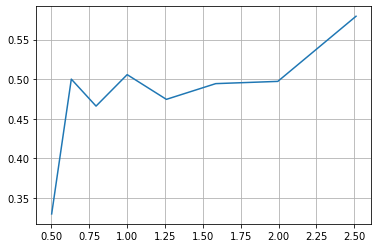

In [ ]:
plt.figure()
plt.plot(EbNo[0:8],BER_sim[0:8])
plt.grid()